In [ ]:
import matplotlib.image as img
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans, vq,whiten


In [ ]:
# load file and print the dimension
cat_image = img.imread('cat3.jpg')
print(cat_image.shape)

(225, 225, 3)


In [ ]:
# store RGB values in lists r,g,b:
r=[]
g=[]
b=[]
for row in cat_image:
    for temp_r, temp_g, temp_b in row:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [ ]:
# Make a dataframe for RGB and scaled the values
list_of_tuples = list(zip(r,g,b))
cat_df = pd.DataFrame(list_of_tuples,columns=['Red','Green','Blue'])
# Use whiten function to scale the data
cat_df['red_scaled'] = whiten(cat_df['Red'])
cat_df['green_scaled'] = whiten(cat_df['Green'])
cat_df['blue_scaled'] = whiten(cat_df['Blue'])

print(cat_df[:5])

   Red  Green  Blue  red_scaled  green_scaled  blue_scaled
0    0    140   193         0.0      3.608863     5.316996
1    0    140   193         0.0      3.608863     5.316996
2    0    140   193         0.0      3.608863     5.316996
3    0    140   193         0.0      3.608863     5.316996
4    0    140   193         0.0      3.608863     5.316996


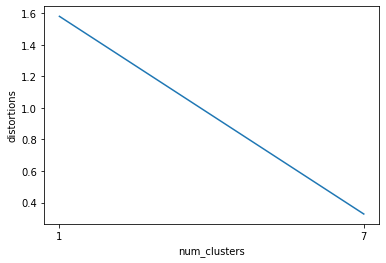

In [ ]:
# Kmeans with elbow method
distortions = []
num_clusters = (1,7)
for i in num_clusters:
    cluster_centers, distortion = kmeans(cat_df[['red_scaled','green_scaled','blue_scaled']],i)
    distortions.append(distortion)

# Create a DataFrame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters':num_clusters, 'distortions':distortions})

# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

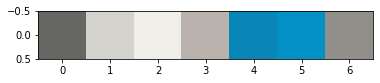

In [ ]:
# Get standard deviation of each color
r_std, g_std, b_std = cat_df[['Red','Green','Blue']].std()
colors=[]
for cluster_center in cluster_centers:
    scaled_r, scaled_g, scaled_b = cluster_center
    # Convert each standardized value to scaled value
    colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255
    ))
# Display colors of cluster centers
plt.imshow([colors])
plt.show()